<a href="https://colab.research.google.com/github/ss22aba/NEW/blob/main/NEW_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-optimize

# **Importing Libraries**

In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import time

# Visualisation Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import missingno as msno

# Pre-Processing Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#Evaluation Libraries
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.dummy import DummyClassifier
from sklearn.inspection import permutation_importance
from skopt import BayesSearchCV
from skopt.space import Real, Integer
from skopt.space import Integer, Categorical

# Model Libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

#Warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# **Importing Data**

In [ ]:
# Uploading the dataset into the colab
from google.colab import files
uploaded = files.upload()

Saving Telco-Customer-Churn.csv to Telco-Customer-Churn (1).csv


In [ ]:
# Read the CSV file into a DataFrame
data = pd.read_csv("Telco-Customer-Churn.csv")

# Display the first five rows of the DataFrame
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# **Dataset Information**

In [ ]:
# Display the summary information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Get the shape of the DataFrame
data.shape

(7043, 21)

# **Dataset Cleaning**

In [ ]:
# Check for any missing values
data.isnull().any().any()

False

<Axes: >

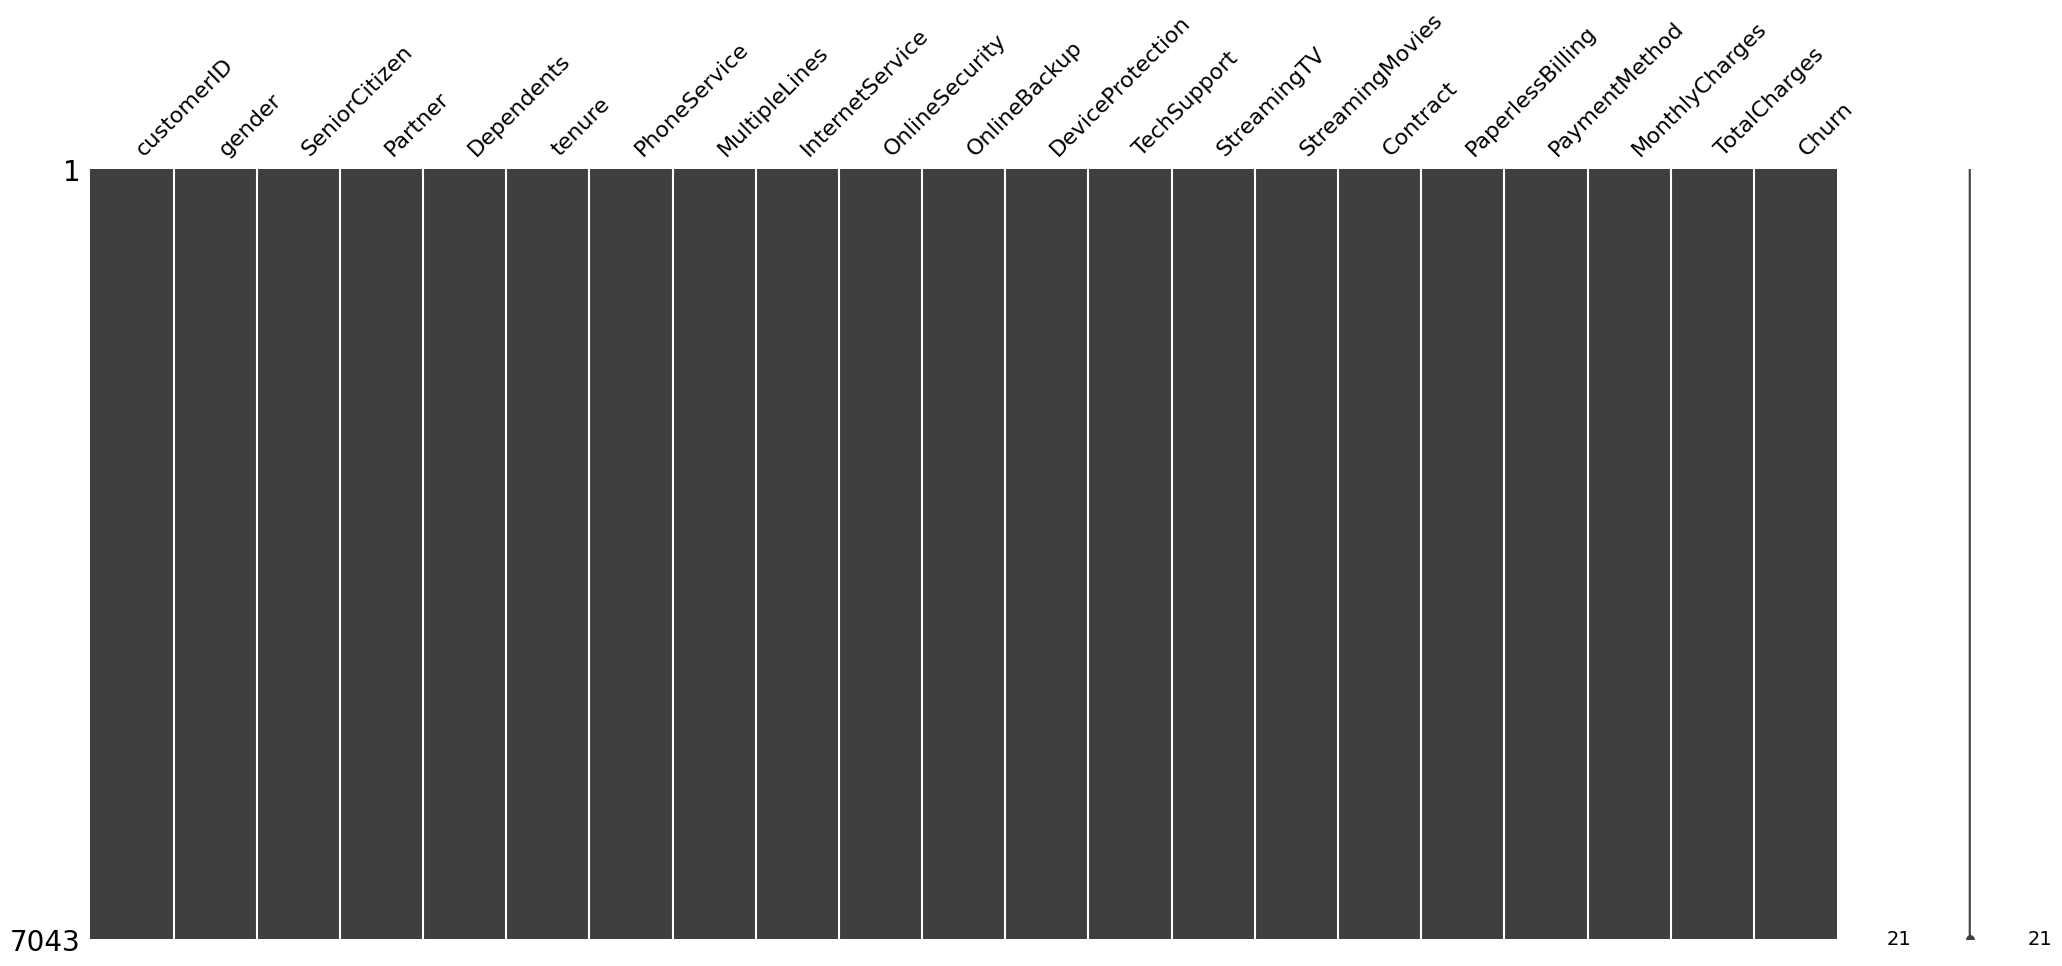

In [ ]:
# Visualize the missing data
msno.matrix(data)

In [ ]:
# Drop the 'customerID' column
data = data.drop(["customerID"], axis = 1)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Identify rows where 'TotalCharges' contains only whitespace
data[data['TotalCharges'].str.strip() == '']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [ ]:
# Convert "TotalCharges" to numeric, coercing errors to NaN
data['TotalCharges'] = pd.to_numeric(data.TotalCharges, errors='coerce')

# Check the number of missing values in each column
data.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [ ]:
# Fill NaN values in "TotalCharges" with the mean of the column
data.fillna(data["TotalCharges"].mean())

# Verify the operation
print("Number of rows after removal and imputation:", data.shape[0])
print("Number of missing values after imputation:", data.isnull().sum())

Number of rows after removal and imputation: 7032
Number of missing values after imputation: gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [ ]:
# Converting the values of Senior Citizen.
data["SeniorCitizen"]= data["SeniorCitizen"].map({0: "No", 1: "Yes"})
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
#Convert categorial features to binary matrix (dummy variable)
data_dummies = pd.get_dummies(data, drop_first = True)

# Rename Churn_yes to Churn
data_dummies.rename(columns = {'Churn_Yes': 'Churn'}, inplace = True)

data_dummies.head()


,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,1,29.85,29.85,False,False,True,False,False,True,False,...,False,False,False,False,False,True,False,True,False,False
1,34,56.95,1889.50,True,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
2,2,53.85,108.15,True,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,True
3,45,42.30,1840.75,True,False,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
4,2,70.70,151.65,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True


from matplotlib import pyplot as plt
_df_0['tenure'].plot(kind='hist', bins=20, title='tenure')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['MonthlyCharges'].plot(kind='hist', bins=20, title='MonthlyCharges')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['TotalCharges'].plot(kind='hist', bins=20, title='TotalCharges')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('gender_Male').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Partner_Yes').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('PhoneService_Yes').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('MultipleLines_No phone service').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='tenure', y='MonthlyCharges', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='MonthlyCharges', y='TotalCharges', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9['tenure'].plot(kind='line', figsize=(8, 4), title='tenure')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['MonthlyCharges'].plot(kind='line', figsize=(8, 4), title='MonthlyCharges')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['TotalCharges'].plot(kind='line', figsize=(8, 4), title='TotalCharges')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Partner_Yes'].value_counts()
    for x_label, grp in _df_12.groupby('gender_Male')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('gender_Male')
_ = plt.ylabel('Partner_Yes')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['PhoneService_Yes'].value_counts()
    for x_label, grp in _df_13.groupby('Partner_Yes')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Partner_Yes')
_ = plt.ylabel('PhoneService_Yes')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['MultipleLines_No phone service'].value_counts()
    for x_label, grp in _df_14.groupby('PhoneService_Yes')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('PhoneService_Yes')
_ = plt.ylabel('MultipleLines_No phone service')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['InternetService_Fiber optic'].value_counts()
    for x_label, grp in _df_15.groupby('MultipleLines_No phone service')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('MultipleLines_No phone service')
_ = plt.ylabel('InternetService_Fiber optic')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_16['gender_Male'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_16, x='tenure', y='gender_Male', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['Partner_Yes'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='tenure', y='Partner_Yes', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_18['PhoneService_Yes'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_18, x='tenure', y='PhoneService_Yes', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['MultipleLines_No phone service'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='tenure', y='MultipleLines_No phone service', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
_df_20['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_21['tenure'].plot(kind='hist', bins=20, title='tenure')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_22['MonthlyCharges'].plot(kind='hist', bins=20, title='MonthlyCharges')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_23['TotalCharges'].plot(kind='hist', bins=20, title='TotalCharges')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_24.groupby('gender_Male').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_25.groupby('Partner_Yes').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_26.groupby('PhoneService_Yes').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_27.groupby('MultipleLines_No phone service').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_28.plot(kind='scatter', x='index', y='tenure', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_29.plot(kind='scatter', x='tenure', y='MonthlyCharges', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_30.plot(kind='scatter', x='MonthlyCharges', y='TotalCharges', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['tenure']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_31.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('gender_Male')):
  _plot_series(series, series_name, i)
  fig.legend(title='gender_Male', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('tenure')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['tenure']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_32.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Partner_Yes')):
  _plot_series(series, series_name, i)
  fig.legend(title='Partner_Yes', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('tenure')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['tenure']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_33.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('PhoneService_Yes')):
  _plot_series(series, series_name, i)
  fig.legend(title='PhoneService_Yes', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('tenure')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['tenure']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_34.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('MultipleLines_No phone service')):
  _plot_series(series, series_name, i)
  fig.legend(title='MultipleLines_No phone service', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('tenure')

from matplotlib import pyplot as plt
_df_35['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_36['tenure'].plot(kind='line', figsize=(8, 4), title='tenure')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_37['MonthlyCharges'].plot(kind='line', figsize=(8, 4), title='MonthlyCharges')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_38['TotalCharges'].plot(kind='line', figsize=(8, 4), title='TotalCharges')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Partner_Yes'].value_counts()
    for x_label, grp in _df_39.groupby('gender_Male')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('gender_Male')
_ = plt.ylabel('Partner_Yes')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['PhoneService_Yes'].value_counts()
    for x_label, grp in _df_40.groupby('Partner_Yes')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Partner_Yes')
_ = plt.ylabel('PhoneService_Yes')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['MultipleLines_No phone service'].value_counts()
    for x_label, grp in _df_41.groupby('PhoneService_Yes')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('PhoneService_Yes')
_ = plt.ylabel('MultipleLines_No phone service')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['InternetService_Fiber optic'].value_counts()
    for x_label, grp in _df_42.groupby('MultipleLines_No phone service')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('MultipleLines_No phone service')
_ = plt.ylabel('InternetService_Fiber optic')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_43['gender_Male'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_43, x='index', y='gender_Male', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_44['Partner_Yes'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_44, x='index', y='Partner_Yes', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_45['PhoneService_Yes'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_45, x='index', y='PhoneService_Yes', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_46['MultipleLines_No phone service'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_46, x='index', y='MultipleLines_No phone service', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

# **Exploratory Data Analysis**

In [ ]:
# Iterate through the columns and print unique values for non-numeric columns
for col in data.columns:
    if data[col].dtype != 'int64' and data[col].dtype != 'float64':
        print(f'{col}: {data[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: ['No' 'Yes']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


# **Churn Distributions**

In [ ]:
# Labels that correspond to the values in the "Churn" column
type_ = ["No", "yes"]

# Create the pie chart
fig = make_subplots(rows=1, cols=1)
fig.add_trace(go.Pie(labels=type_, values=data['Churn'].value_counts(), name="Churn"))

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Churn Distributions",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Churn', x=0.5, y=0.5, font_size=20, showarrow=False)])
fig.show()

# **Numerical Features**
*   Tenure
*   Monthly Charges
*   Total Charges




In [ ]:
# Create a Kernel Density Estimate (KDE) plot for the distribution of a numerical feature with respect to the 'Churn' status.
def numericalKde(feature):
    plt.figure(figsize=(11, 4))
    plt.title("KDE for {}".format(feature))
    ax1 = sns.kdeplot(data[data['Churn']== 'No'][feature].dropna(), color = '#C9E4DE', label = 'Churn: No')
    ax2 = sns.kdeplot(data[data['Churn']== 'Yes'][feature].dropna(), color = '#fec3a6', label = 'Churn: Yes')
    plt.legend()

**KDE for Tenure**

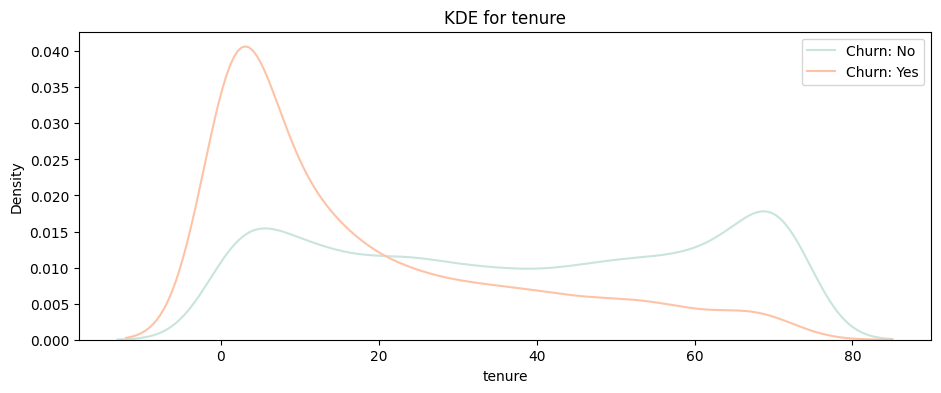

In [ ]:
numericalKde('tenure')

**KDE for Monthly Charges**

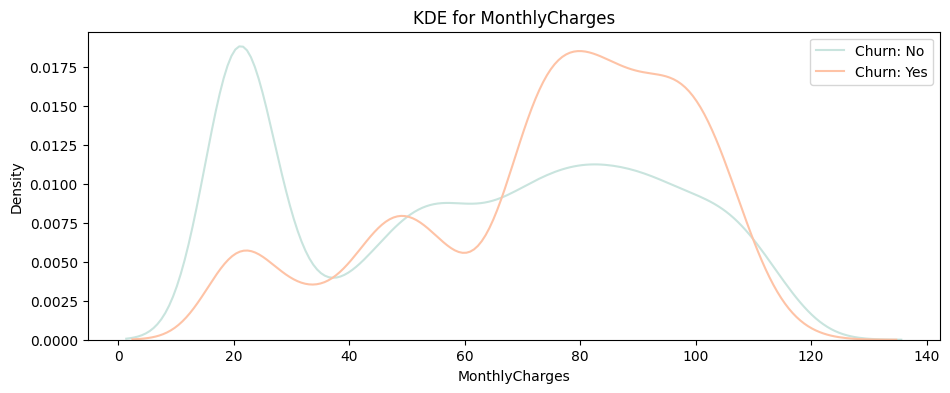

In [ ]:
numericalKde('MonthlyCharges')

**KDE for Total Charges**

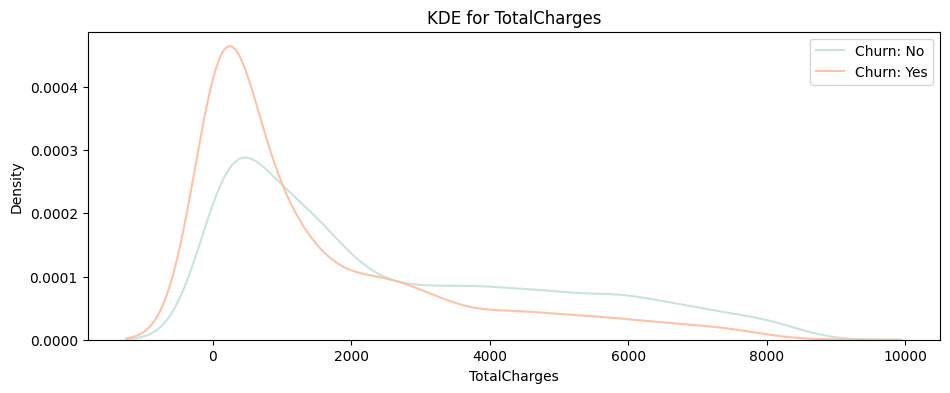

In [ ]:
numericalKde('TotalCharges')

**Numerical Features Summary**
*   The longer the customer has been with the telco company, the less likely they will churn.
*   Customers with higher monthly charges are more likely to churn.

# **Categorical Features**

In [ ]:
def categoricalBar(feature, ax):
    sns.countplot(x=feature, hue='Churn', data=data, ax=ax, palette=['#C9E4DE', '#fec3a6'])
    ax.set_title(f'Count of Churn by {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')

**Demographic Information**
*   Gender
*   SeniorCitizen
*   Partner
*   Dependents

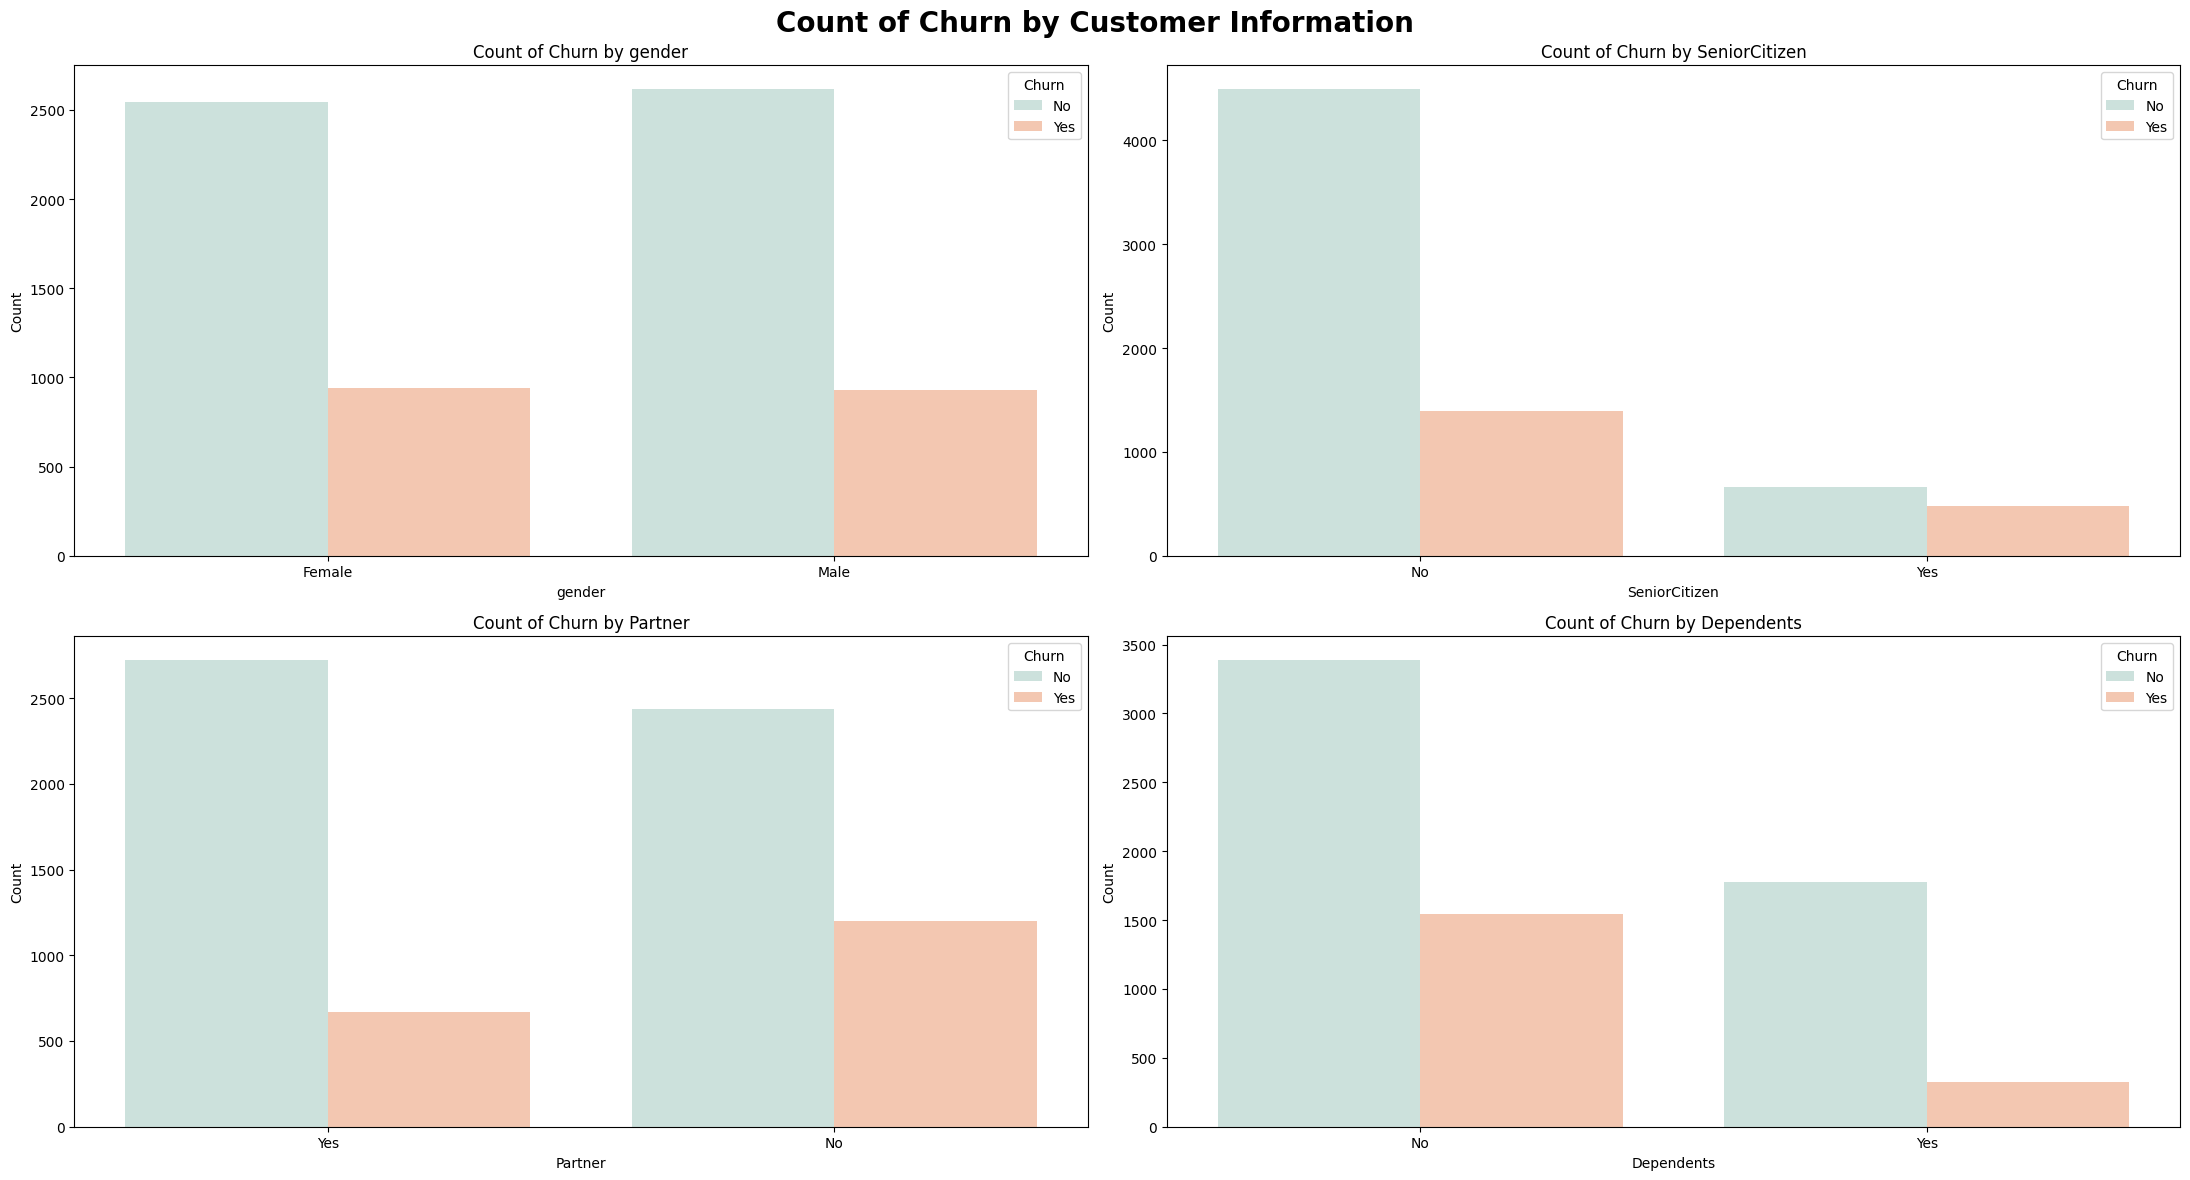

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(22, 12))
categoricalBar('gender',ax1)
categoricalBar('SeniorCitizen',ax2)
categoricalBar('Partner',ax3)
categoricalBar('Dependents',ax4)

fig.suptitle('Count of Churn by Customer Information', fontsize=20, fontweight = 'bold')
plt.tight_layout()
plt.show()

**General Services**
*   PhoneService
*   MultipleLines
*   InternetService
*   StreamingTV
*   StreamingMovies

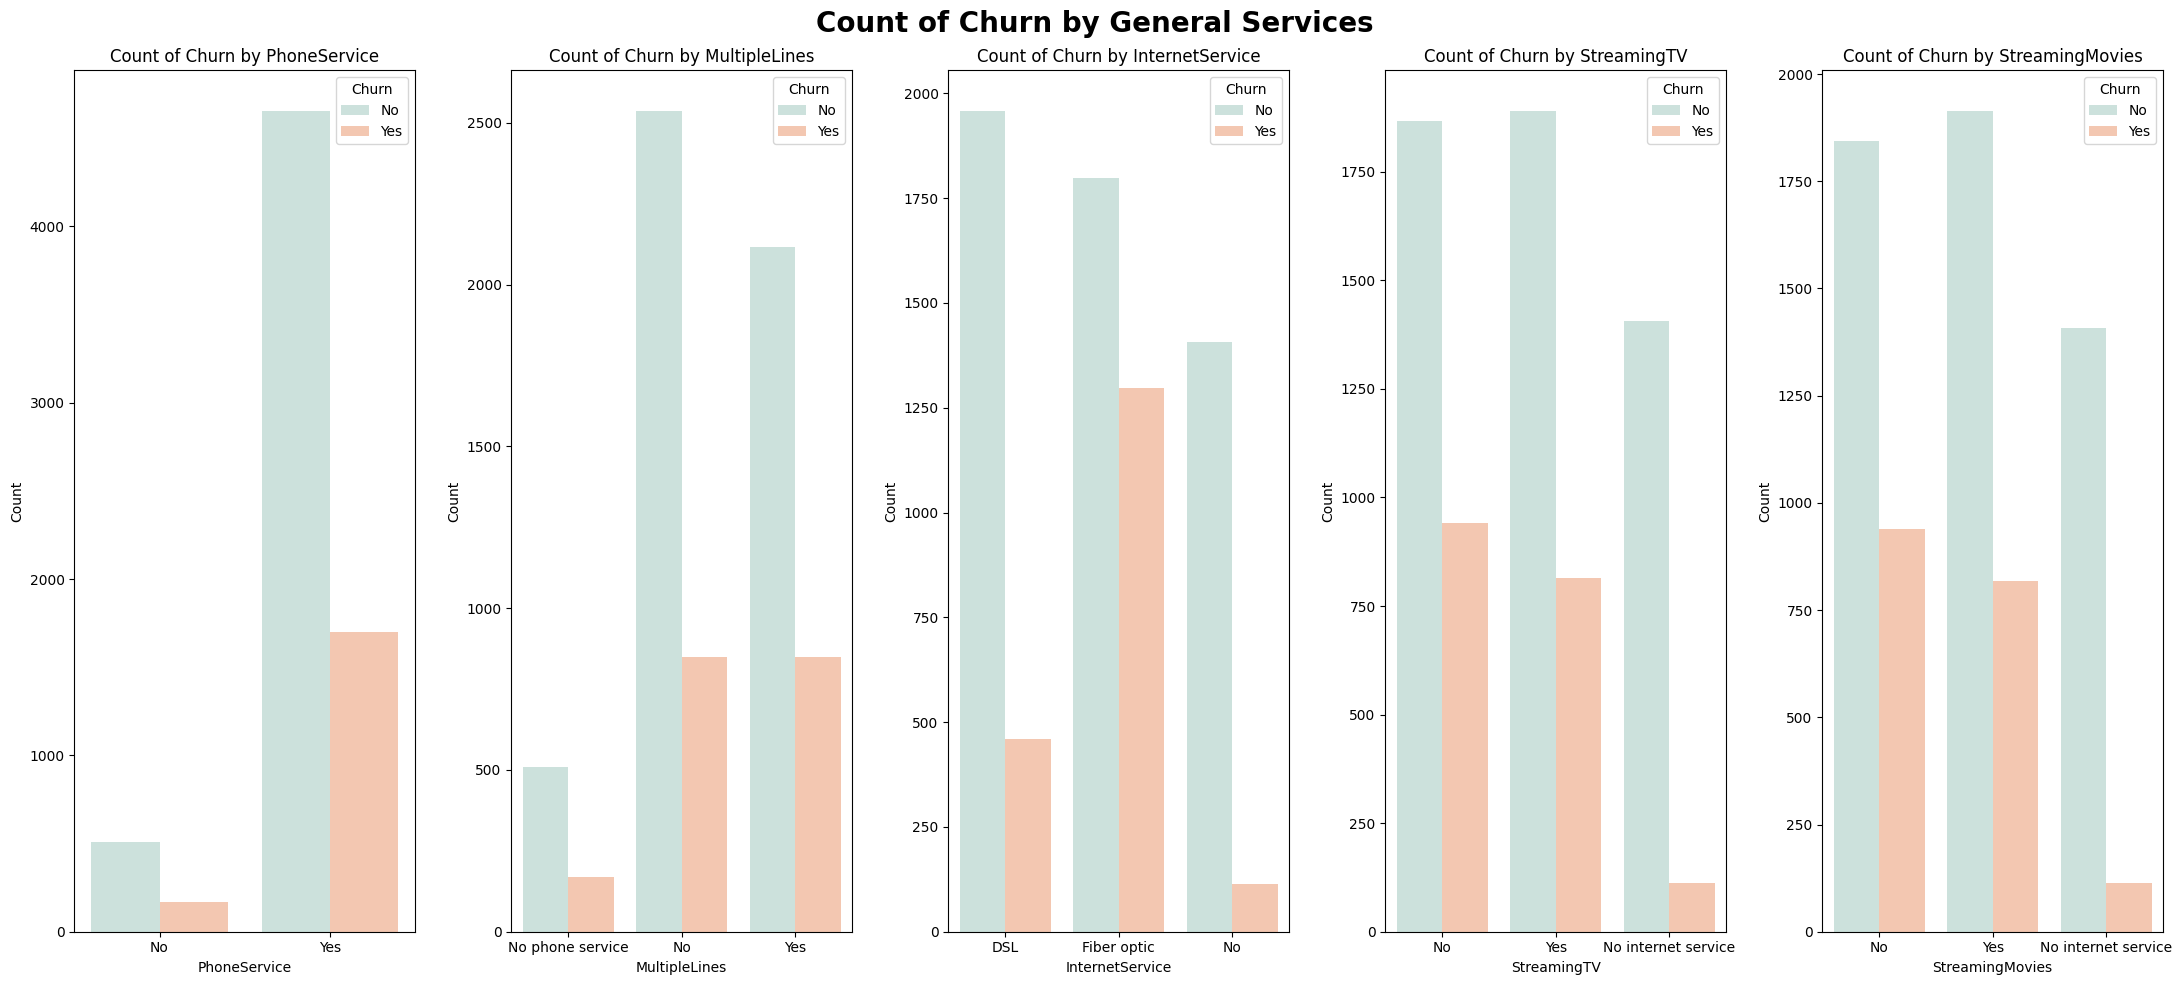

In [ ]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5, figsize=(22, 10))
categoricalBar('PhoneService',ax1)
categoricalBar('MultipleLines',ax2)
categoricalBar('InternetService',ax3)
categoricalBar('StreamingTV',ax4)
categoricalBar('StreamingMovies',ax5)

fig.suptitle('Count of Churn by General Services', fontsize=20, fontweight = 'bold')
plt.tight_layout()
plt.show()

**Support Services**
*   OnlineSecurity
*   OnlineBackup
*   DeviceProtection
*   TechSupport


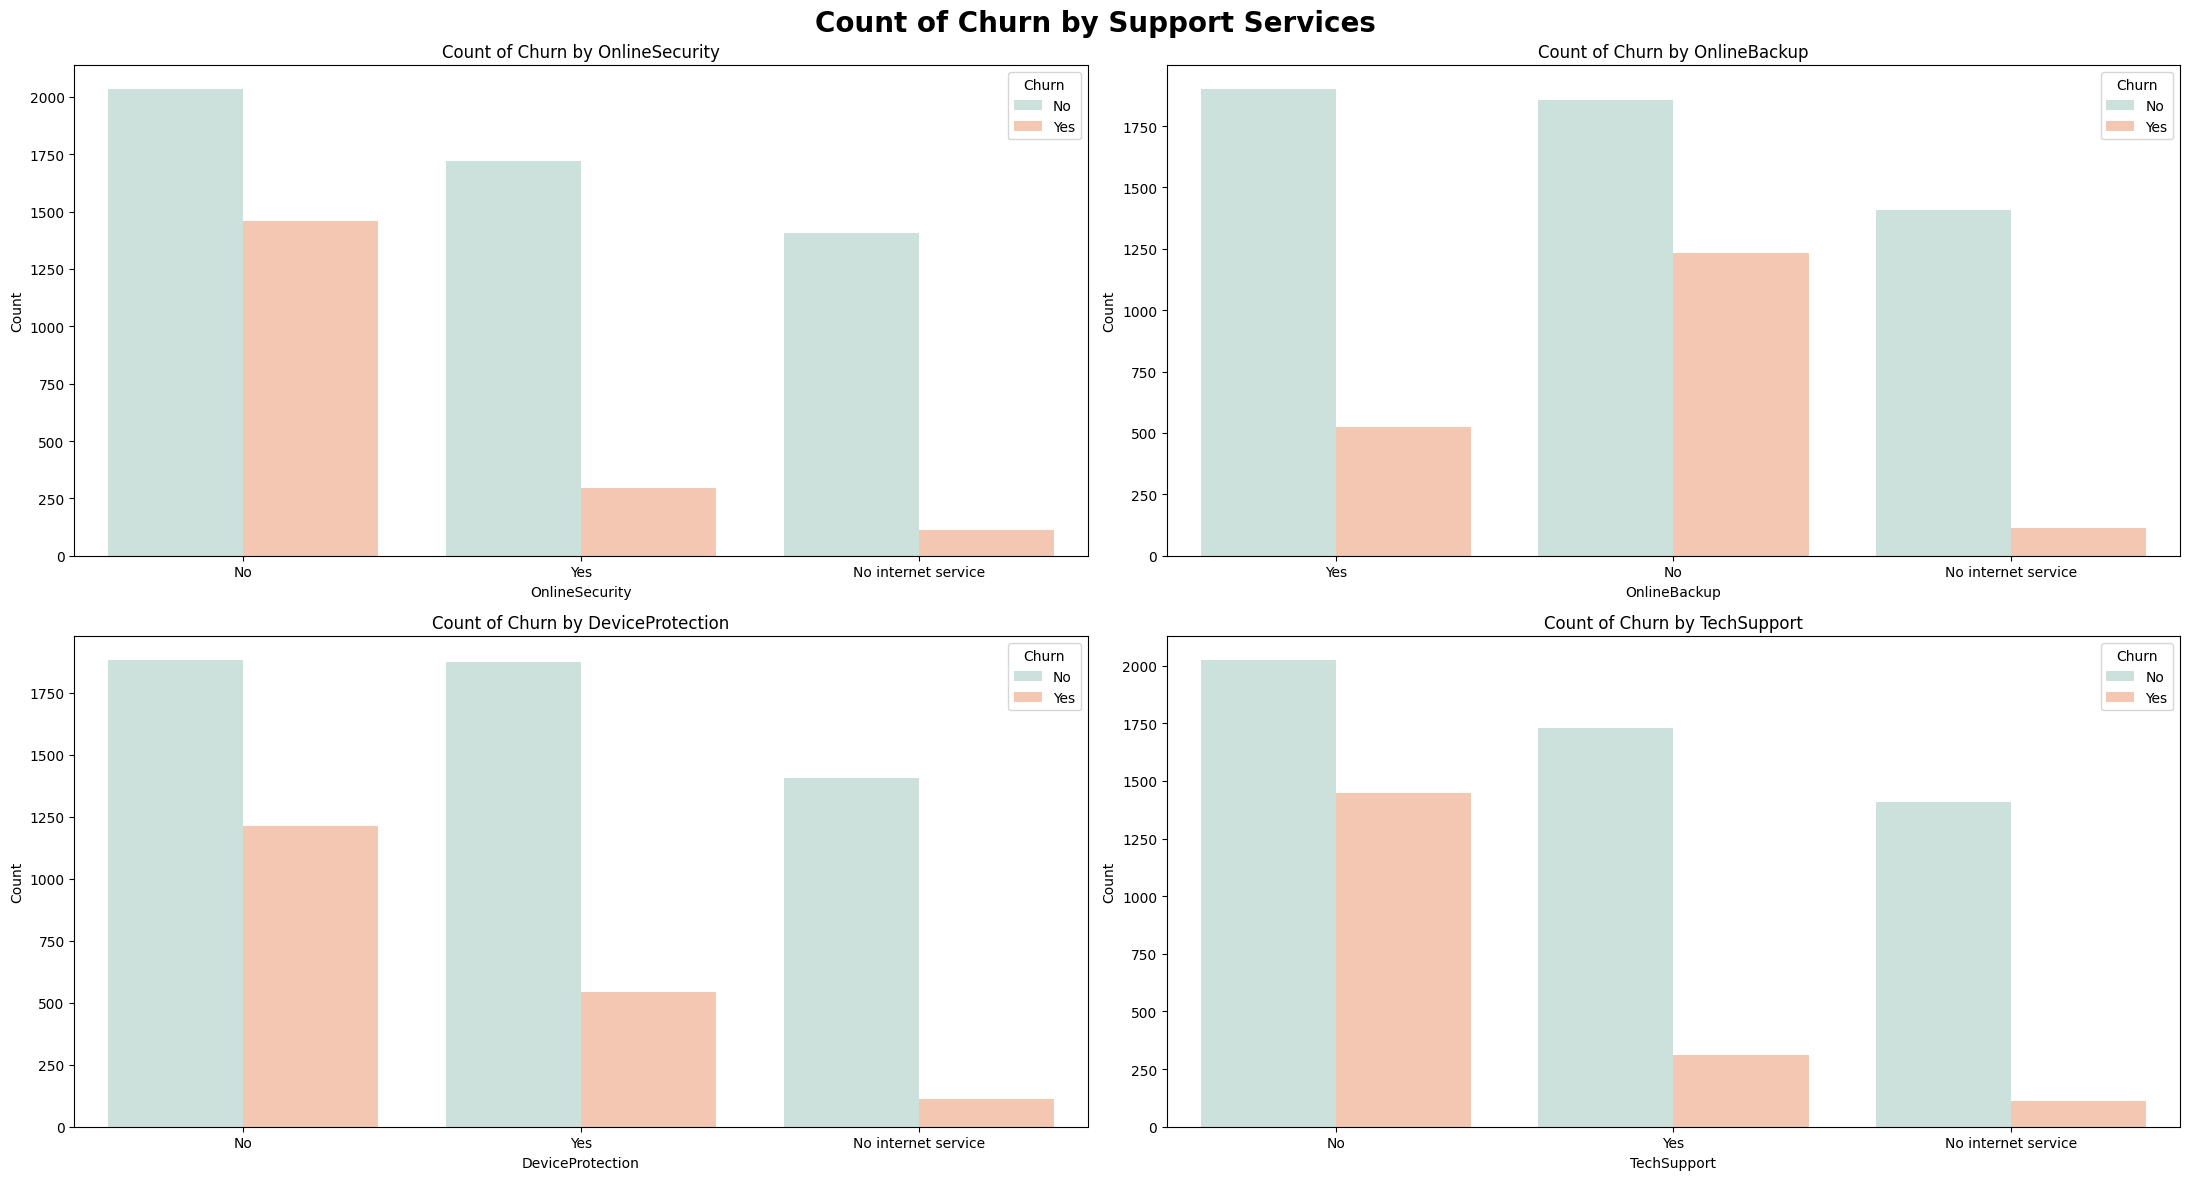

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(22, 12))
categoricalBar('OnlineSecurity',ax1)
categoricalBar('OnlineBackup',ax2)
categoricalBar('DeviceProtection',ax3)
categoricalBar('TechSupport',ax4)

fig.suptitle('Count of Churn by Support Services', fontsize=20, fontweight = 'bold')
plt.tight_layout()
plt.show()

**Payments**
*  Contract
*  PaperlessBilling
*  PaymentMethod


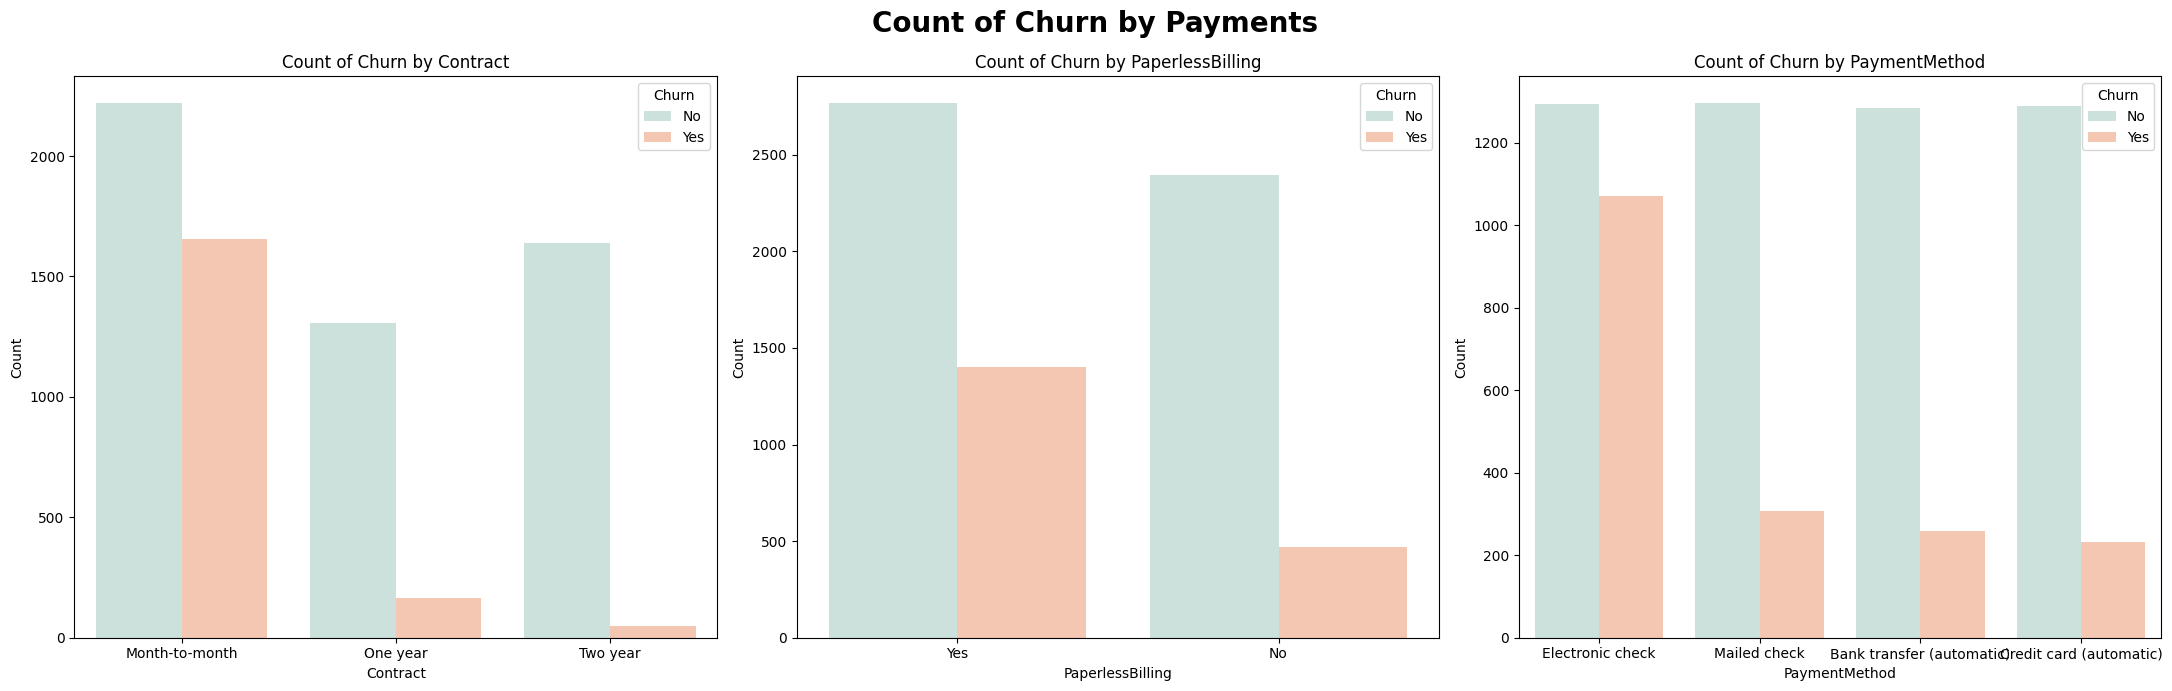

In [ ]:
fig, (ax1, ax2,ax3) = plt.subplots(1,3, figsize=(22, 7))
categoricalBar('Contract',ax1)
categoricalBar('PaperlessBilling',ax2)
categoricalBar('PaymentMethod',ax3)

fig.suptitle('Count of Churn by Payments', fontsize=20, fontweight = 'bold')
plt.tight_layout()
plt.show()

**Categorical Features Summary**
*  Customers who do not subscribe to support services are more likely to churn.
*  Customers with short term contracts are more likely to churn.
*  Customers with paperless billing are more likely to churn
*  Customers with electronic check are more likely to churn

# **Feature Engineering**

**Define Features and Target Variable**

In [ ]:
# Variables
X = data_dummies.iloc[:, :-1]
y = data_dummies.iloc[:,-1]

**Train Test Split**

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 42)

In [ ]:
# Get the shape of the training data
train_data_shape = X_train.shape
train_labels_shape = y_train.shape

# Get the shape of the testing data
test_data_shape = X_test.shape
test_labels_shape = y_test.shape

print("Shape of X_train:", train_data_shape)
print("Shape of y_train:", train_labels_shape)
print("Shape of X_test:", test_data_shape)
print("Shape of y_test:", test_labels_shape)

Shape of X_train: (5634, 30)
Shape of y_train: (5634,)
Shape of X_test: (1409, 30)
Shape of y_test: (1409,)


**Feature Scaling**

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = pd.DataFrame(scaler.transform(X_train), columns = X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

# **Model Selections**

**Base Model 1 : Random Forest Classifier**

Time taken to fit the model: 0.78 seconds
Time taken to predict: 0.04 seconds
Random Forest Classifier: 0.78

Classification Report for Random Forest Classifier:
              precision    recall  f1-score   support

       False       0.82      0.89      0.86      1033
        True       0.62      0.47      0.53       374

    accuracy                           0.78      1407
   macro avg       0.72      0.68      0.69      1407
weighted avg       0.77      0.78      0.77      1407



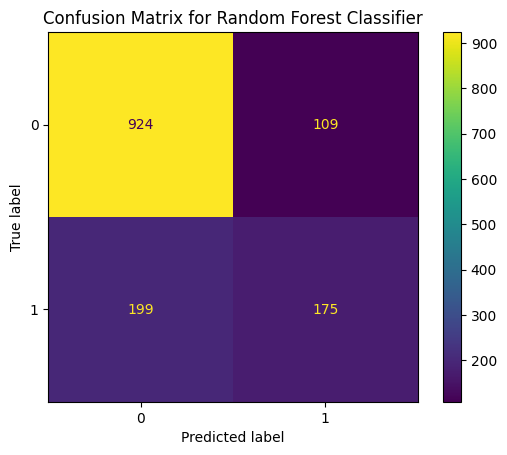

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Measure the time taken to fit the model
start_time_fit = time.time()
rf.fit(X_train, y_train)
end_time_fit = time.time()
fit_time = end_time_fit - start_time_fit

# Measure the time taken to predict
start_time_predict = time.time()
y_pred_rf = rf.predict(X_test)
end_time_predict = time.time()
predict_time = end_time_predict - start_time_predict

#Prediction
y_pred_rf = rf.predict(X_test)

#Accuracy
rf_accuracy = rf.score(X_test, y_test)

# Print the time taken
print(f'Time taken to fit the model: {fit_time:.2f} seconds')
print(f'Time taken to predict: {predict_time:.2f} seconds')

#Classification Report
rf_classification_report = classification_report(y_test, y_pred_rf)

print(f'Random Forest Classifier: {rf_accuracy:.2f}\n')
print(f'Classification Report for Random Forest Classifier:\n{rf_classification_report}')

#Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
display_rf = ConfusionMatrixDisplay(confusion_matrix = cm_rf)
display_rf.plot()
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

**Base Model 2 : K - Nearest Neighbors Classifier**

Time taken to fit the model: 0.00 seconds
Time taken to predict: 0.40 seconds
K Neighbors Classifier: 0.75

Classification Report for K Neighbors Classifier:
              precision    recall  f1-score   support

       False       0.83      0.83      0.83      1033
        True       0.52      0.51      0.52       374

    accuracy                           0.75      1407
   macro avg       0.67      0.67      0.67      1407
weighted avg       0.75      0.75      0.75      1407



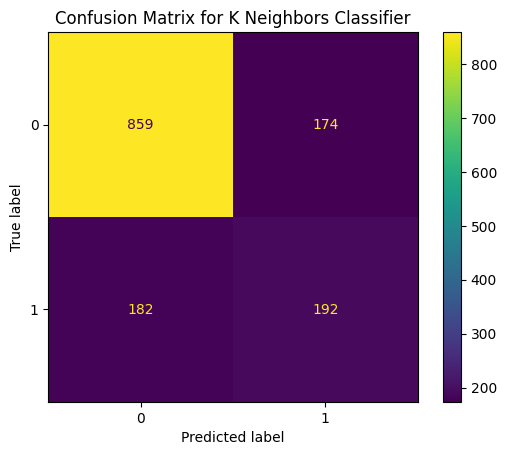

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Measure the time taken to fit the model
start_time_fit = time.time()
knn.fit(X_train, y_train)
end_time_fit = time.time()
fit_time = end_time_fit - start_time_fit

# Measure the time taken to predict
start_time_predict = time.time()
y_pred_knn = knn.predict(X_test)
end_time_predict = time.time()
predict_time = end_time_predict - start_time_predict

#Prediction
y_pred_knn = knn.predict(X_test)

#Accuracy
knn_accuracy = knn.score(X_test, y_test)

# Print the time taken
print(f'Time taken to fit the model: {fit_time:.2f} seconds')
print(f'Time taken to predict: {predict_time:.2f} seconds')

#Classification Report
knn_classification_report = classification_report(y_test, y_pred_knn)

print(f'K Neighbors Classifier: {knn_accuracy:.2f}\n')
print(f'Classification Report for K Neighbors Classifier:\n{knn_classification_report}')

#Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
display_knn = ConfusionMatrixDisplay(confusion_matrix = cm_knn)
display_knn.plot()
plt.title('Confusion Matrix for K Neighbors Classifier')
plt.show()

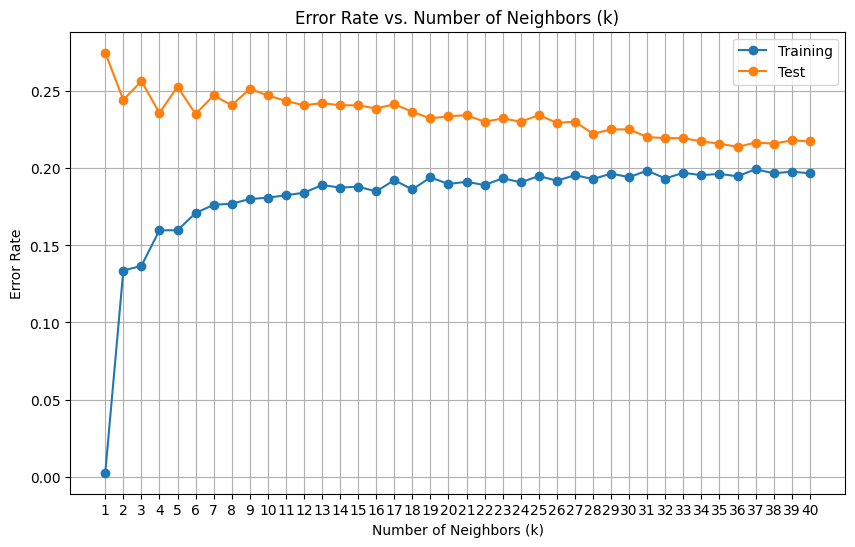

The optimal number of neighbors (k) is: 36
The minimum test error is: 0.2139


In [ ]:
# Error curve for different k values
k_values = range(1, 41)  # Modified range from 1 to 50
errors_train = []
errors_test = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)

    error_train = 1 - accuracy_score(y_train, y_train_pred)
    error_test = 1 - accuracy_score(y_test, y_test_pred)

    errors_train.append(error_train)
    errors_test.append(error_test)

# Determine the optimal k value
optimal_k = k_values[np.argmin(errors_test)]
optimal_test_error = min(errors_test)

# Plotting the error curves
plt.figure(figsize=(10, 6))
plt.plot(k_values, errors_train, marker='o', label='Training')
plt.plot(k_values, errors_test, marker='o', label='Test')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error Rate')
plt.title('Error Rate vs. Number of Neighbors (k)')
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()

# Print the optimal k value
print(f'The optimal number of neighbors (k) is: {optimal_k}')
print(f'The minimum test error is: {optimal_test_error:.4f}')

**Base Model 3 : GradientBoostingClassifier**

Time taken to fit the model: 1.56 seconds
Time taken to predict: 0.01 seconds
Gradient Boosting Classifier: 0.79

Classification Report for Gradient Boosting Classifier:
              precision    recall  f1-score   support

       False       0.83      0.90      0.86      1033
        True       0.64      0.48      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.78      0.79      0.78      1407



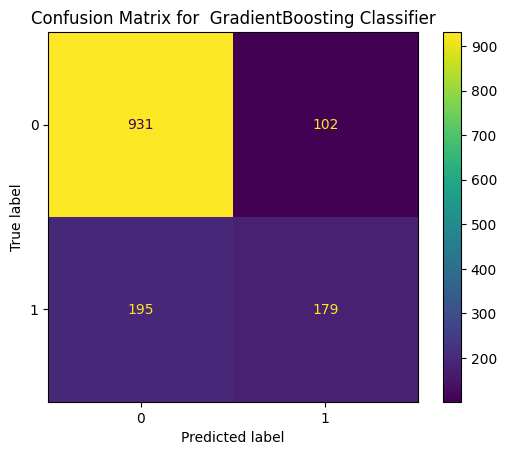

In [ ]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

# Measure the time taken to fit the model
start_time_fit = time.time()
gb.fit(X_train, y_train)
end_time_fit = time.time()
fit_time = end_time_fit - start_time_fit

# Measure the time taken to predict
start_time_predict = time.time()
y_pred_gb = gb.predict(X_test)
end_time_predict = time.time()
predict_time = end_time_predict - start_time_predict

#Prediction
y_pred_gb = gb.predict(X_test)

#Accuracy
gb_accuracy = gb.score(X_test, y_test)

# Print the time taken
print(f'Time taken to fit the model: {fit_time:.2f} seconds')
print(f'Time taken to predict: {predict_time:.2f} seconds')

#Classification Report
gb_classification_report = classification_report(y_test, y_pred_gb)

print(f'Gradient Boosting Classifier: {gb_accuracy:.2f}\n')
print(f'Classification Report for Gradient Boosting Classifier:\n{gb_classification_report}')

#Confusion Matrix
cm_gb = confusion_matrix(y_test, y_pred_gb)
display_gb = ConfusionMatrixDisplay(confusion_matrix = cm_gb)
display_gb.plot()
plt.title('Confusion Matrix for  GradientBoosting Classifier')
plt.show()

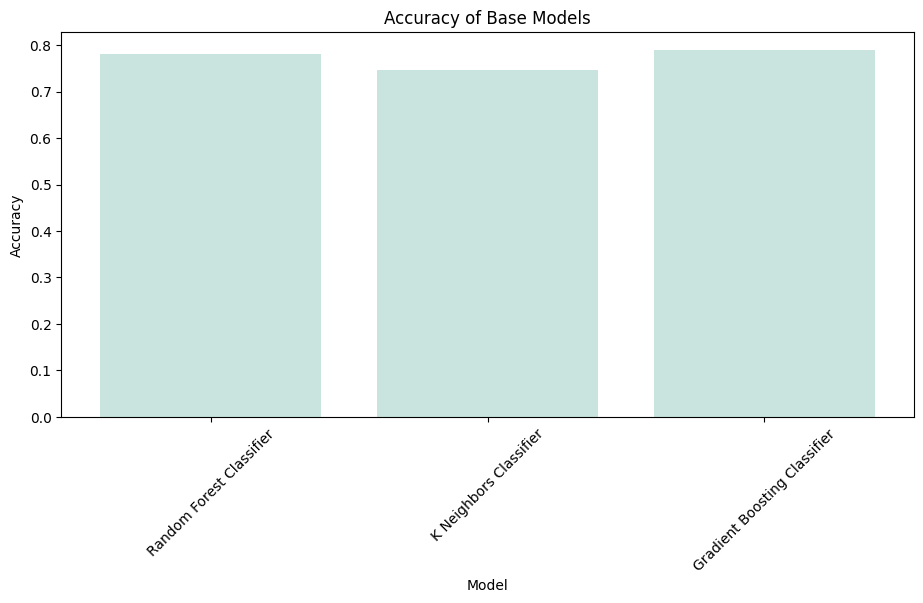

In [ ]:
accuracies = [['Random Forest Classifier',rf_accuracy],
              ['K Neighbors Classifier',knn_accuracy],
              ['Gradient Boosting Classifier',gb_accuracy]]

accuracies_df = pd.DataFrame(accuracies, columns = ['Model','Accuracy'])

plt.figure(figsize=(11, 5))
plt.bar(accuracies_df['Model'], accuracies_df['Accuracy'], color = '#C9E4DE')
plt.xticks(rotation=45)
plt.title('Accuracy of Base Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

# **Hyperparameter Tuning for the models**

 **Hyperparameter Tunning RandomForestClassifier**

In [ ]:
# Define the parameter search space
param_space = {
    'n_estimators': Integer(10, 1000),
    'max_depth': Integer(1, 50),
    'min_samples_split': Integer(2, 20),
    'min_samples_leaf': Integer(1, 20),
    'max_features': Real(0.1, 1.0)
}

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Set up the BayesSearchCV
bayes_search = BayesSearchCV(
    estimator=rf,
    search_spaces=param_space,
    n_iter=32,
    cv=3,
    n_jobs=-1,
    random_state=42
)
# Fit the model and measure the time taken to fit
start_time_fit = time.time()
bayes_search.fit(X_train, y_train)
end_time_fit = time.time()
fit_time = end_time_fit - start_time_fit

# Measure the time taken to predict
start_time_predict = time.time()
y_pred_rf = bayes_search.predict(X_test)
end_time_predict = time.time()
predict_time = end_time_predict - start_time_predict

# Prediction and Accuracy
rf_accuracy = bayes_search.score(X_test, y_test)

# Classification Report
rf_classification_report = classification_report(y_test, y_pred_rf)

# Print results
print(f'Random Forest Classifier Accuracy: {rf_accuracy:.2f}')
print(f'Time taken to fit the model: {fit_time:.2f} seconds')
print(f'Time taken to predict: {predict_time:.2f} seconds')
print(f'Classification Report for Random Forest Classifier:\n{rf_classification_report}')


Random Forest Classifier Accuracy: 0.80
Time taken to fit the model: 415.98 seconds
Time taken to predict: 0.05 seconds
Classification Report for Random Forest Classifier:
              precision    recall  f1-score   support

       False       0.83      0.92      0.87      1033
        True       0.67      0.48      0.56       374

    accuracy                           0.80      1407
   macro avg       0.75      0.70      0.71      1407
weighted avg       0.79      0.80      0.79      1407



**Hyperparameter Tunning knn**

In [ ]:
# Define the parameter search space for KNeighborsClassifier
param_space = {
    'n_neighbors': Integer(1, 30),
    'weights': Categorical(['uniform', 'distance']),
    'p': Integer(1, 5)  # Power parameter for the distance metric
}

# Initialize the KNeighborsClassifier
knn = KNeighborsClassifier()

# Set up the BayesSearchCV
bayes_search = BayesSearchCV(
    estimator=knn,
    search_spaces=param_space,
    n_iter=32,
    cv=3,
    n_jobs=-1,
    random_state=42
)

# Fit the model and measure the time taken to fit
start_time_fit = time.time()
bayes_search.fit(X_train, y_train)
end_time_fit = time.time()
fit_time = end_time_fit - start_time_fit

# Measure the time taken to predict
start_time_predict = time.time()
y_pred_knn = bayes_search.predict(X_test)
end_time_predict = time.time()
predict_time = end_time_predict - start_time_predict

# Prediction and Accuracy
knn_accuracy = bayes_search.score(X_test, y_test)

# Classification Report
knn_classification_report = classification_report(y_test, y_pred_knn)

# Print results
print(f'K Neighbors Classifier Accuracy: {knn_accuracy:.2f}')
print(f'Time taken to fit the model: {fit_time:.2f} seconds')
print(f'Time taken to predict: {predict_time:.2f} seconds')
print(f'Classification Report for K Neighbors Classifier:\n{knn_classification_report}')

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning:

The objective has been evaluated at point [30, 1, 'uniform'] before, using random point [6, 4, 'distance']

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning:

The objective has been evaluated at point [30, 1, 'uniform'] before, using random point [29, 4, 'distance']

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning:

The objective has been evaluated at point [30, 1, 'uniform'] before, using random point [5, 4, 'distance']

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning:

The objective has been evaluated at point [30, 1, 'uniform'] before, using random point [5, 3, 'distance']

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning:

The objective has been evaluated at point [30, 1, 'uniform'] before, using random point [3, 4, 'distance']



K Neighbors Classifier Accuracy: 0.78
Time taken to fit the model: 270.05 seconds
Time taken to predict: 0.83 seconds
Classification Report for K Neighbors Classifier:
              precision    recall  f1-score   support

       False       0.84      0.87      0.85      1033
        True       0.60      0.53      0.57       374

    accuracy                           0.78      1407
   macro avg       0.72      0.70      0.71      1407
weighted avg       0.77      0.78      0.78      1407



**Hyperparameter Tunning GradientBoostingClassifier**

In [ ]:
# Define the parameter search space for GradientBoostingClassifier
param_space = {
    'n_estimators': Integer(50, 1000),
    'learning_rate': Real(0.01, 1.0, 'log-uniform'),
    'max_depth': Integer(1, 50),
    'min_samples_split': Integer(2, 20),
    'min_samples_leaf': Integer(1, 20),
    'max_features': Real(0.1, 1.0)
}

# Initialize the GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=42)

# Set up the BayesSearchCV
bayes_search = BayesSearchCV(
    estimator=gb,
    search_spaces=param_space,
    n_iter=32,
    cv=3,
    n_jobs=-1,
    random_state=42
)

# Fit the model and measure the time taken to fit
start_time_fit = time.time()
bayes_search.fit(X_train, y_train)
end_time_fit = time.time()
fit_time = end_time_fit - start_time_fit

# Measure the time taken to predict
start_time_predict = time.time()
y_pred_gb = bayes_search.predict(X_test)
end_time_predict = time.time()
predict_time = end_time_predict - start_time_predict

# Prediction and Accuracy
gb_accuracy = bayes_search.score(X_test, y_test)

# Classification Report
gb_classification_report = classification_report(y_test, y_pred_gb)

# Print results
print(f'Gradient Boosting Classifier Accuracy: {gb_accuracy:.2f}')
print(f'Time taken to fit the model: {fit_time:.2f} seconds')
print(f'Time taken to predict: {predict_time:.2f} seconds')
print(f'Classification Report for Gradient Boosting Classifier:\n{gb_classification_report}')

Gradient Boosting Classifier Accuracy: 0.79
Time taken to fit the model: 627.71 seconds
Time taken to predict: 0.02 seconds
Classification Report for Gradient Boosting Classifier:
              precision    recall  f1-score   support

       False       0.82      0.93      0.87      1033
        True       0.68      0.42      0.52       374

    accuracy                           0.79      1407
   macro avg       0.75      0.67      0.69      1407
weighted avg       0.78      0.79      0.78      1407



**ROC curve for the Random Forest Classifier**

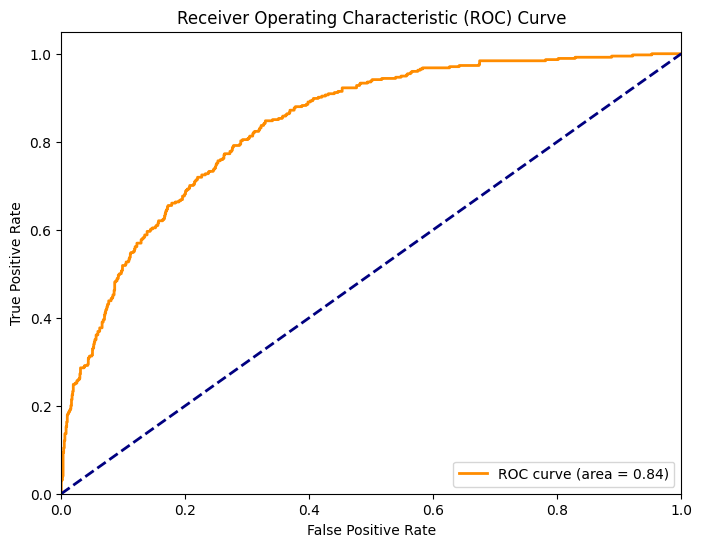

In [ ]:
# Get the predicted probabilities for the test data
y_pred_prob_rf = bayes_search.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_rf)
roc_auc = roc_auc_score(y_test, y_pred_prob_rf)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# **Important Predictors**

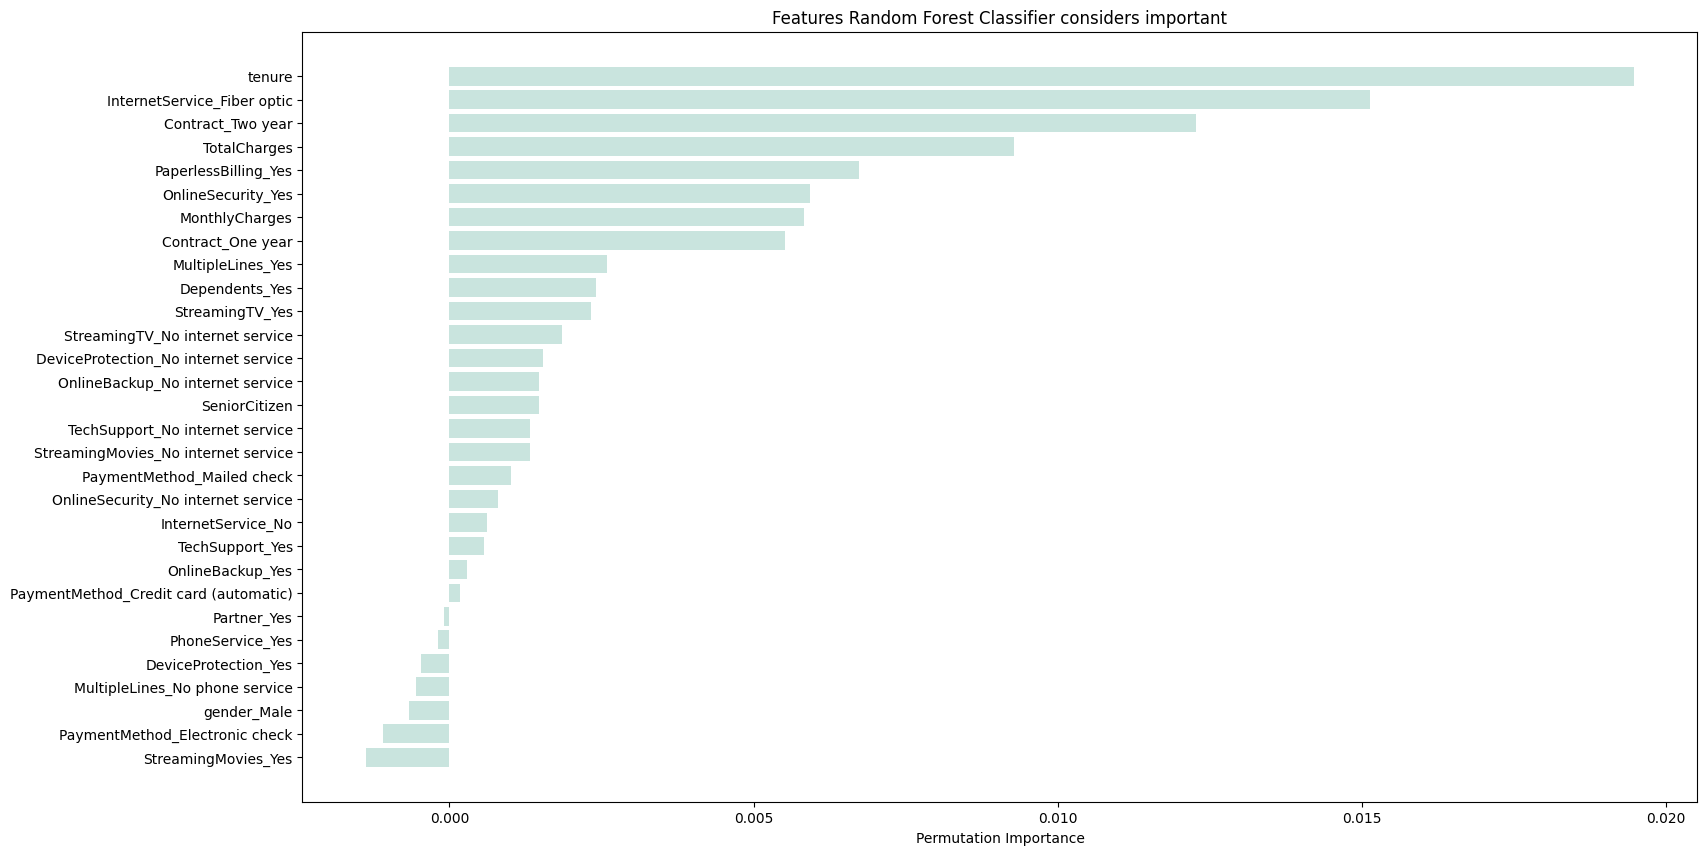

In [ ]:
# Compute permutation importance
perm_importance = permutation_importance(bayes_search, X_test, y_test, n_repeats=30, random_state=42, n_jobs=-1)

# Get feature names
feature_names = X.columns
features = np.array(feature_names)

# Sort features by importance
sorted_idx = perm_importance.importances_mean.argsort()

# Plot the permutation importance
plt.figure(figsize=(18, 10))
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx], color='#C9E4DE')
plt.title('Features Random Forest Classifier considers important')
plt.xlabel("Permutation Importance")
plt.show()